CUSTOMER SEGMENTATION ML PROJECT

Step 1 : Import all modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
print("Done!")

Done!


Step 2 : Create Data Frame

In [7]:
df = pd.read_excel(r"C:\Users\vaish\OneDrive\Documents\GitHub\Customer-Segmentation\data\Mall Customers.xlsx")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [9]:
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


Step 3 : Data Cleaning

In [10]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Education                 0
Marital Status            0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# No null values are present.

In [12]:
# Drop any duplicate values (If exists)
df = df.drop_duplicates()
df

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40
...,...,...,...,...,...,...,...
195,196,F,35,High School,Married,120,79
196,197,F,45,High School,Unknown,126,28
197,198,M,32,Uneducated,Married,126,74
198,199,M,32,High School,Married,137,18


In [13]:
# Here the column "CustomerID" is not required. It has nothing to do with clustering.
df = df.drop(columns=['CustomerID'])

In [14]:
df

,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,M,19,High School,Married,15,39
1,M,21,Graduate,Single,15,81
2,F,20,Graduate,Married,16,6
3,F,23,High School,Unknown,16,77
4,F,31,Uneducated,Married,17,40
...,...,...,...,...,...,...
195,F,35,High School,Married,120,79
196,F,45,High School,Unknown,126,28
197,M,32,Uneducated,Married,126,74
198,M,32,High School,Married,137,18


STEP 4 : Encode Categorical Data

In [15]:
df["Gender"] = df["Gender"].map({"M":0, "F":1})
df.head()

,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,0,19,High School,Married,15,39
1,0,21,Graduate,Single,15,81
2,1,20,Graduate,Married,16,6
3,1,23,High School,Unknown,16,77
4,1,31,Uneducated,Married,17,40


Step 5:EDA visualization


Univariate(Histogram(age))

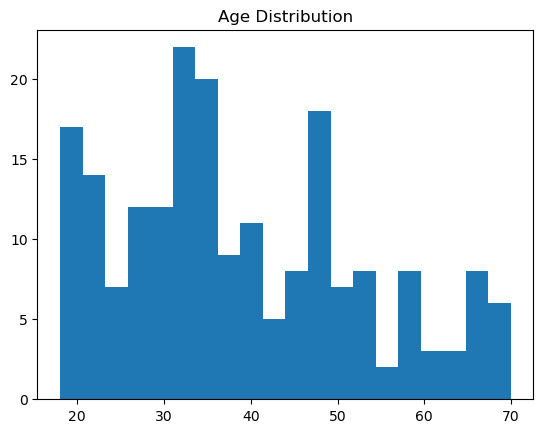

In [16]:
plt.hist(df["Age"], bins=20)
plt.title("Age Distribution")
plt.show()

Bivariate (Scatter(Income vs Spending))

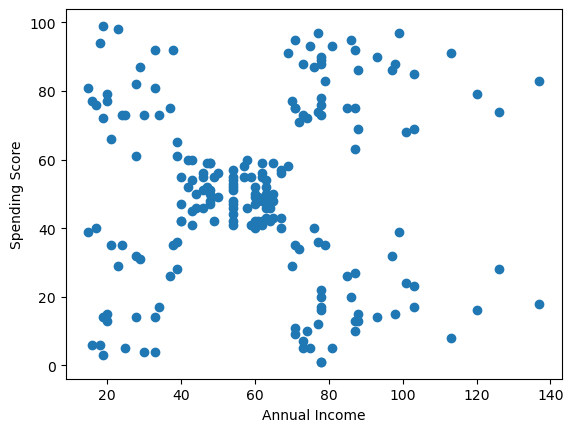

In [17]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

Outlier boxplot detection

<Axes: xlabel='Annual Income (k$)'>

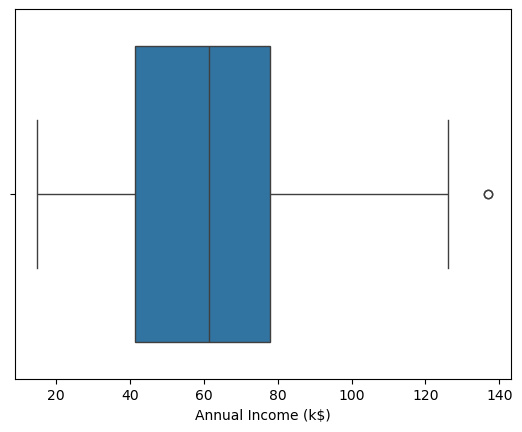

In [18]:
sb.boxplot(x=df["Annual Income (k$)"])

Step 6: Feature Selection

In [19]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

STEP 7 : Feature Scaling

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

STEP 8 : Find Optimal K (Elbow Method)

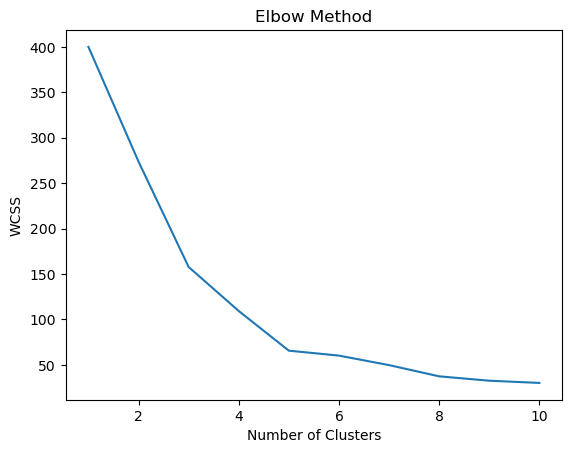

In [27]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
# elbow at K = 5

In [ ]:
#!pip install kneed

  Using cached kneed-0.8.5-py3-none-any.whl.metadata (5.5 kB)
Using cached kneed-0.8.5-py3-none-any.whl (10 kB)



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
#!pip install kneed

from kneed import KneeLocator

kl = KneeLocator(range(1,11),wcss,curve = "convex", direction = 'decreasing')

In [31]:
kl.elbow

5

Step 9: Apply KMeans

In [32]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df["Cluster"] = y_kmeans
df.head()

,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,High School,Married,15,39,4
1,0,21,Graduate,Single,15,81,2
2,1,20,Graduate,Married,16,6,4
3,1,23,High School,Unknown,16,77,2
4,1,31,Uneducated,Married,17,40,4


Step 10: Visualize Clusters

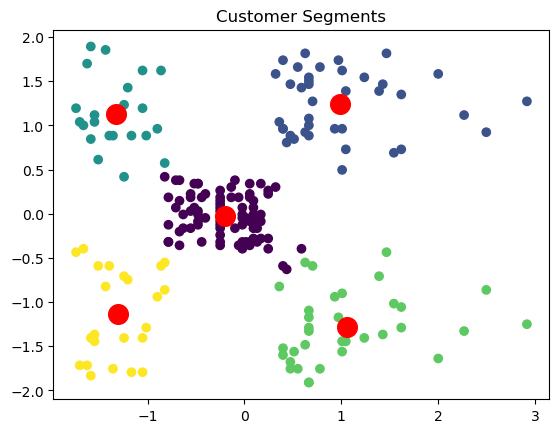

In [33]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=200, c='red')
plt.title("Customer Segments")
plt.show()